In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Preprocessing 

In [2]:
calories = pd.read_csv('calories.csv')
data = pd.read_csv('exercise.csv')

In [3]:
df = data.merge(calories,on='User_ID')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


Checking Missing Values

In [5]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Checking Duplicate Values

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['User_ID'],inplace=True)

Exploratory Data Analysis With Visualisation 

In [8]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
df['Gender'] = df['Gender'].replace({'female':0,'male':1})

Wall time: 5.69 s


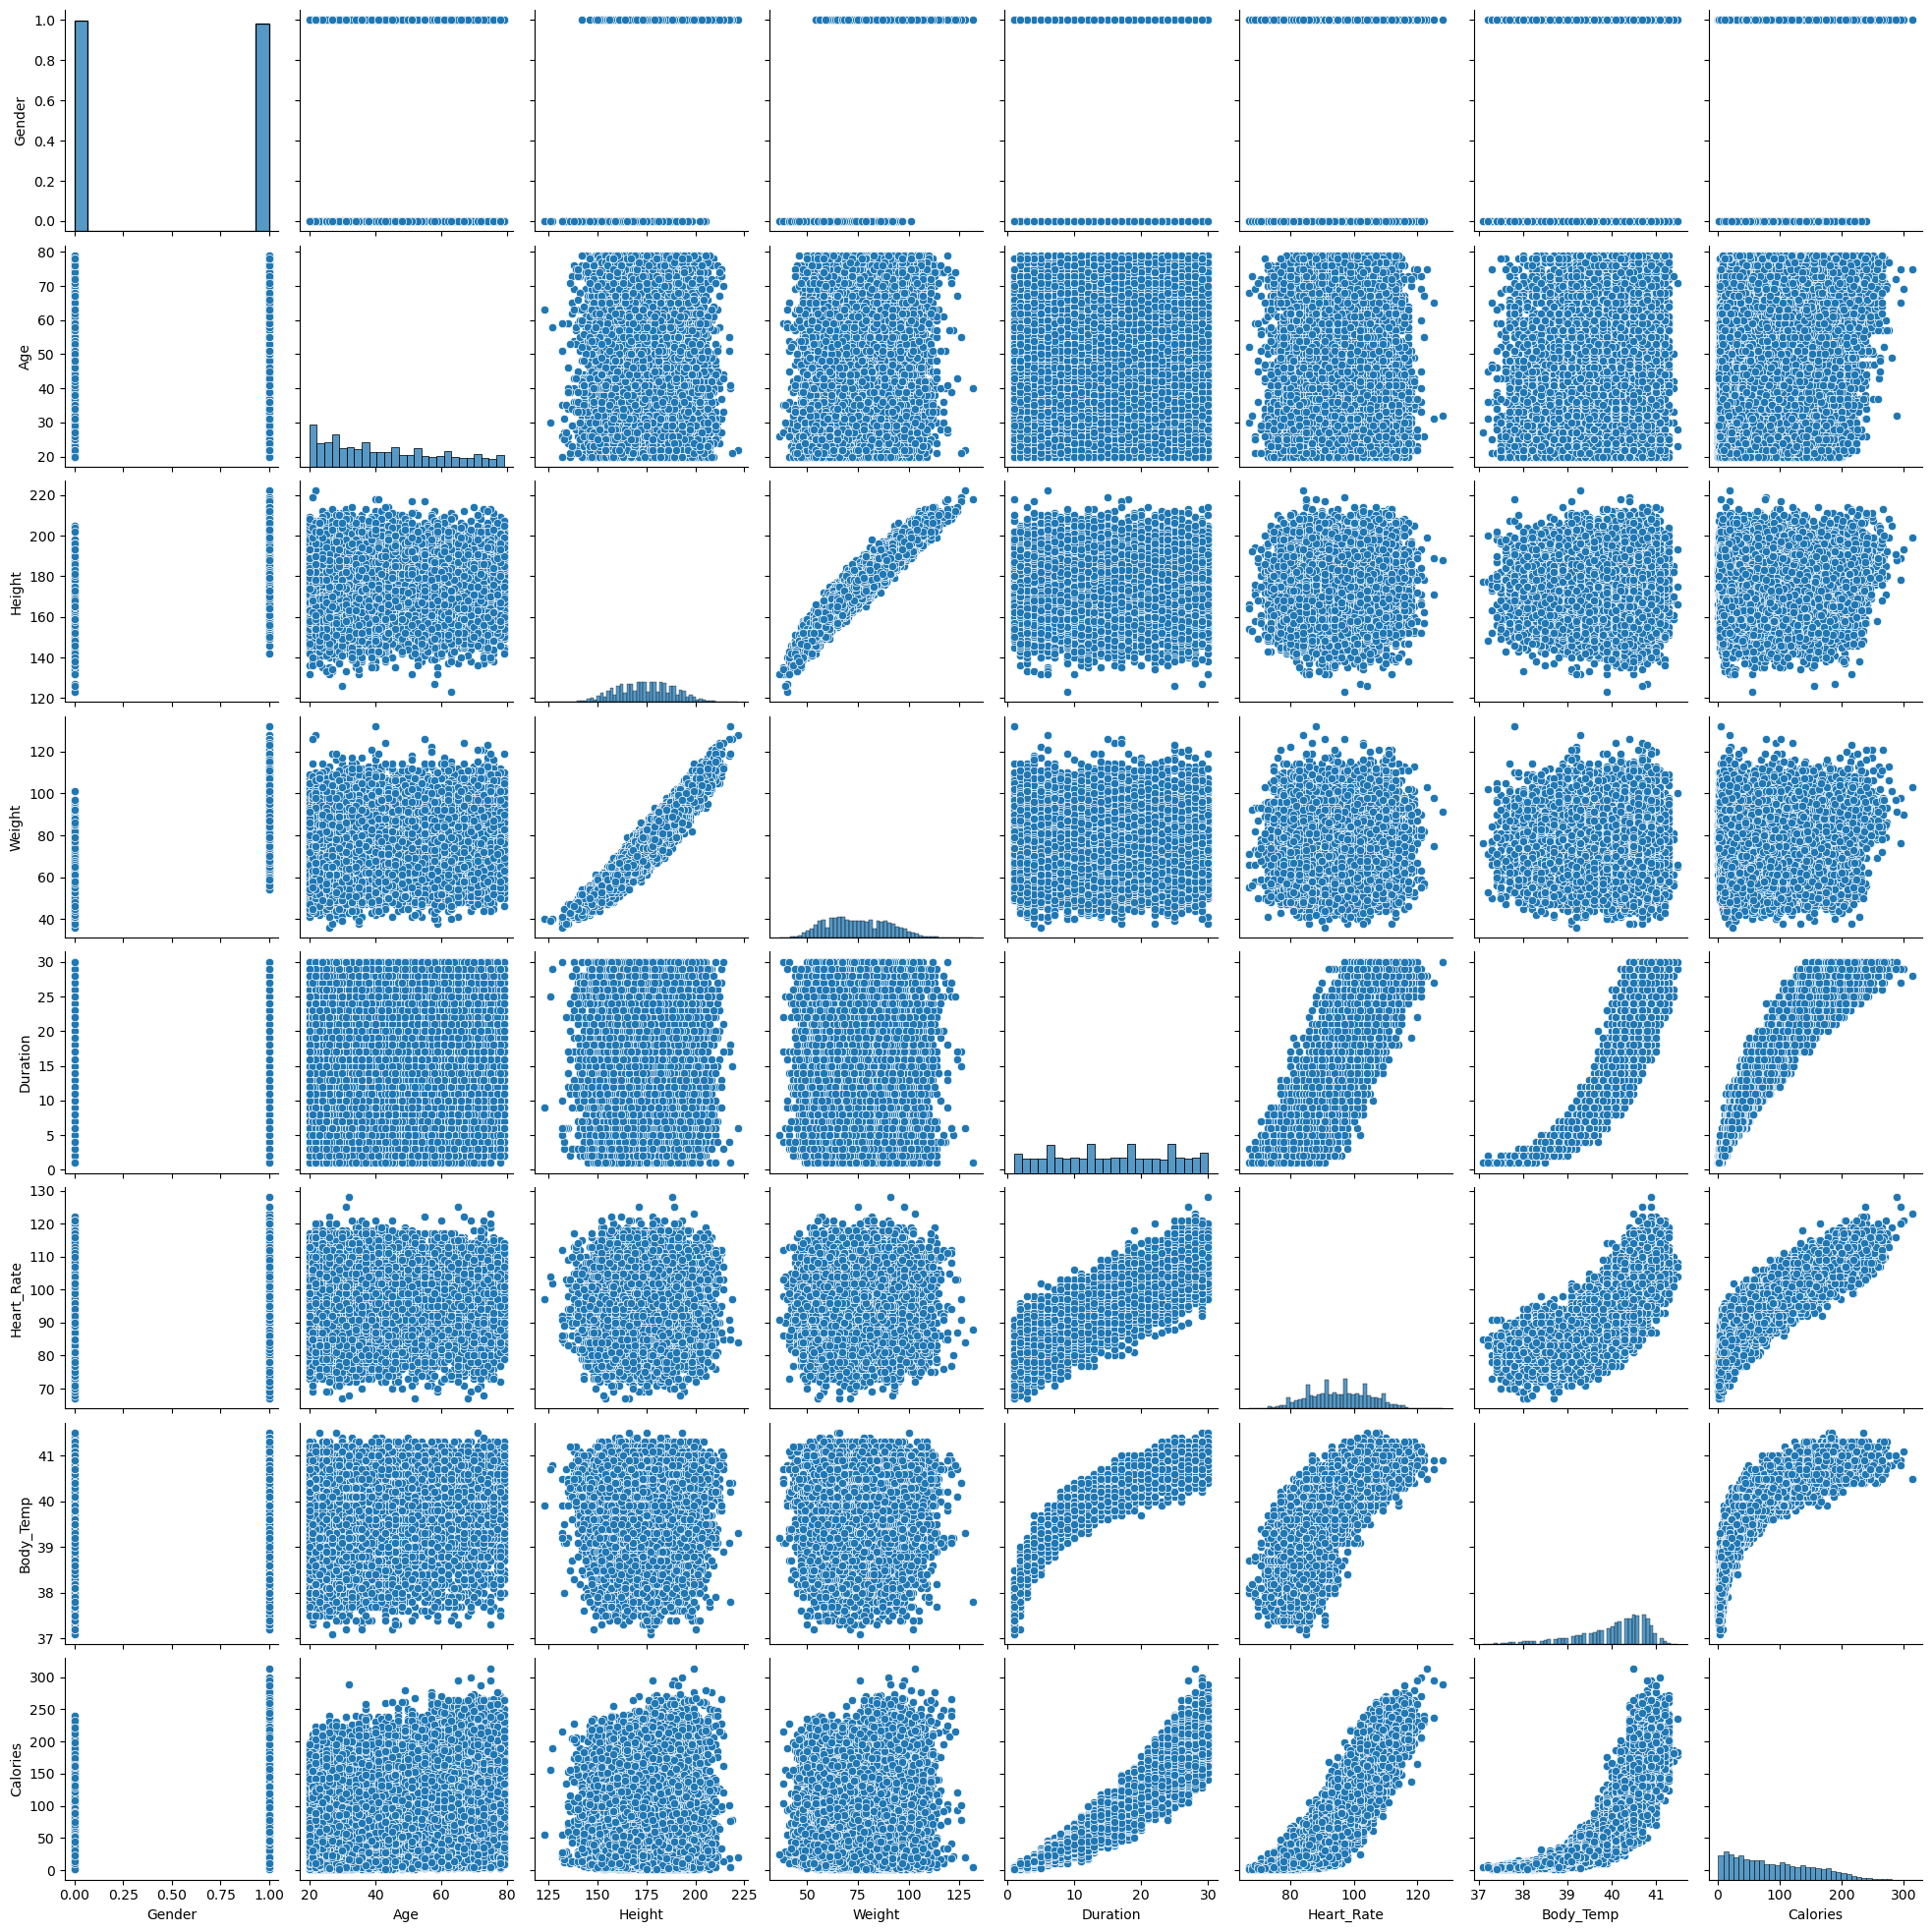

In [10]:
%%time
sns.pairplot(df)

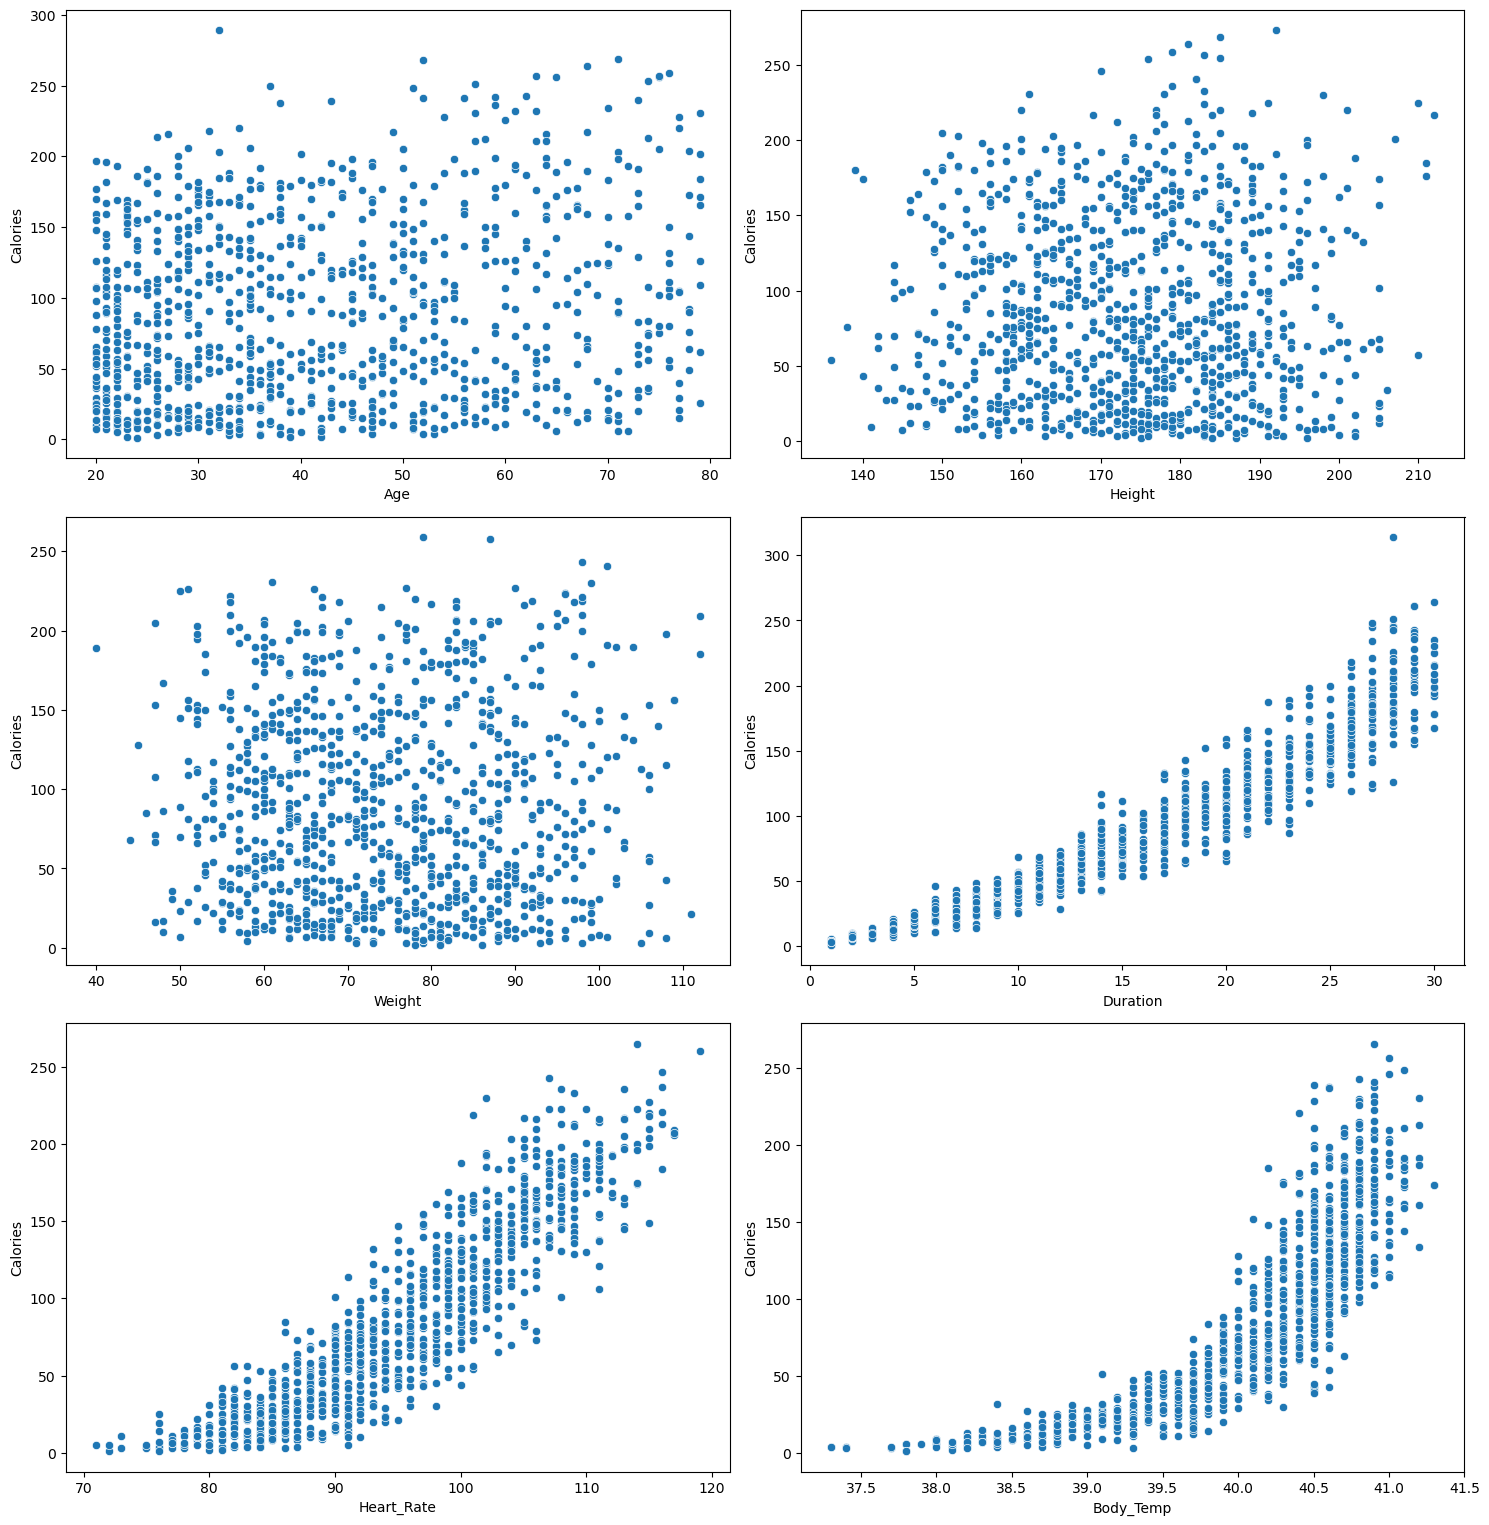

In [11]:
import warnings
warnings.filterwarnings('ignore')
features = ['Age', 'Height', 'Weight', 'Duration','Heart_Rate','Body_Temp',] 
  
plt.subplots(figsize=(15, 20)) 
for i, col in enumerate(features): 
    plt.subplot(4, 2, i + 1) 
    x = df.sample(1000) 
    sns.scatterplot(x[col], x['Calories']) 
plt.tight_layout() 
plt.show() 

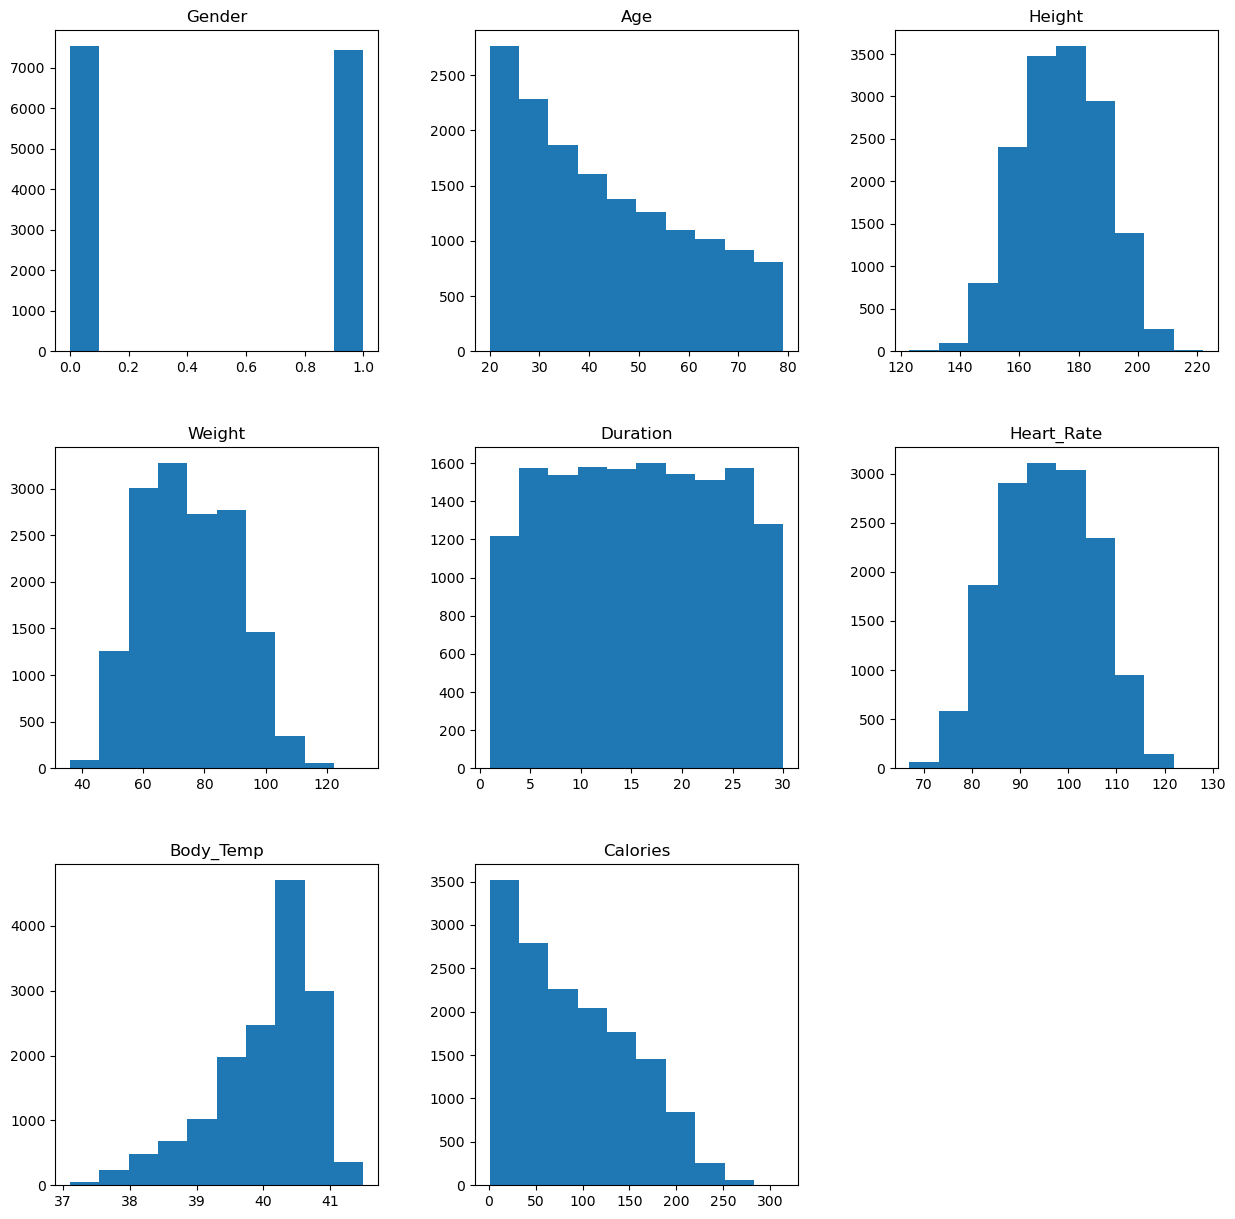

In [12]:
%matplotlib inline
hist = df.hist(figsize=(15,15),grid=False)

Correlation 

In [13]:
correlation = df.corr()
correlation

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<AxesSubplot:>

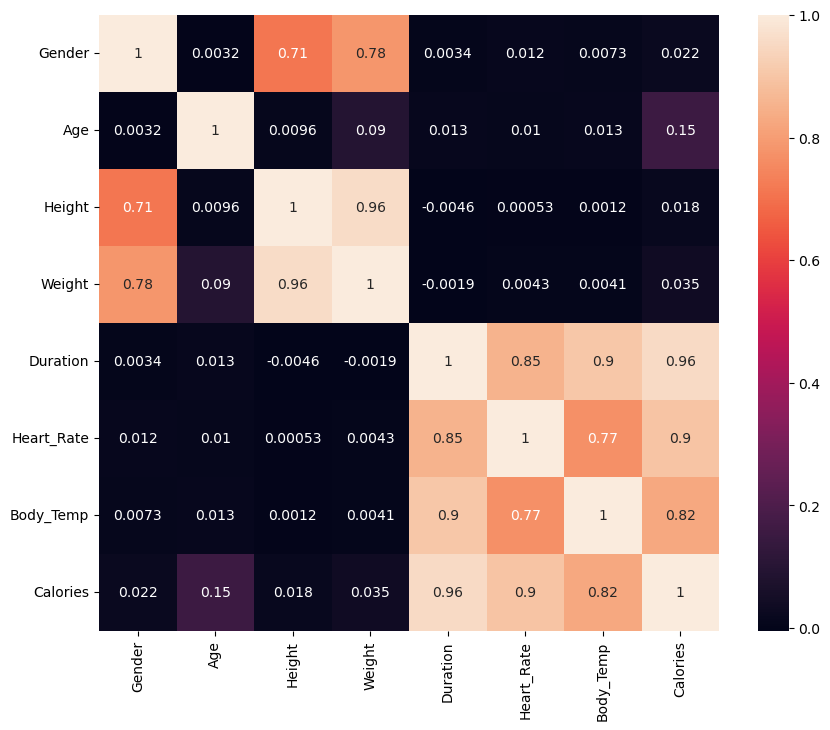

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)

<AxesSubplot:>

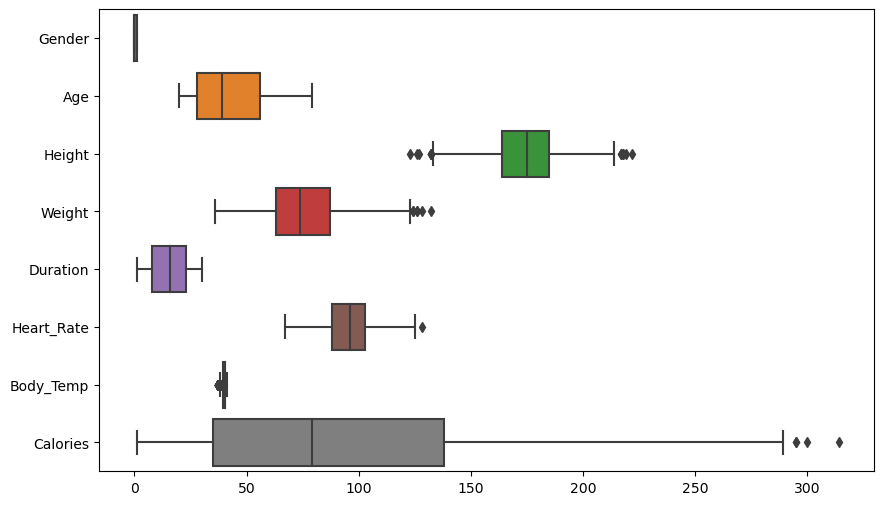

In [69]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,orient='h')

In [76]:
q1 = df['Calories'].quantile(0.25)
q3 = df['Calories'].quantile(0.75)

iqr = q3 - q1

In [77]:
iqr

103.0

In [78]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_filtered = df[(df['Calories'] >= lower_bound) & (df['Calories'] <= upper_bound)]

In [79]:
df_filtered.shape

(14996, 8)

In [15]:
%config Completer.use_jedi = False


Model Training,Testing And Evaluation

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,LassoCV,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

In [17]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
print(X_train.shape)

(12000, 7)


In [20]:
scaler = StandardScaler()

Scaled Data 

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
lr_model = LinearRegression()

In [24]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred_normal = lr_model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [123]:
def model_evaluation(y_test,y_pred,X_train,y_train,model):
    print('Mean Squared Error      : ',mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('Mean Absolute Error     : ',mean_absolute_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    print('R-Squared               : ',r2)
    n = len(y_test)
    k = X_train.shape[1]
    diffr2 = 1-r2
    diffrows = n-1
    diffrowsfeatue = n-1-k
    adj_r_squared = 1 - (diffr2 * diffrows / deffrowsfeatue)
    print('Adjusted R-squared      : ',adj_r_squared)
    kf = KFold(n_splits=5,shuffle=True,random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    print('scores : ',-cv_scores)
    print('Mean Score : ',-np.mean(cv_scores))

Regression on Scaled Data 

In [124]:
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [125]:
y_pred_scaled = lr_model.predict(X_test_scaled)

In [126]:
scaled_data = model_evaluation(y_test,y_pred_scaled,X_train_scaled,y_train,lr_model)

Mean Squared Error      :  131.99574575081698
Root Mean Squared Error :  11.48894014915288
Mean Absolute Error     :  8.441513553849706
R-Squared               :  0.9672937151257295
Adjusted R-squared      :  0.9659304799104074
scores :  [11.09977049 11.51982898 11.30966775 11.26925536 11.15192976]
Mean Score :  11.270090468557196


Polynomial Regression

In [127]:
poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [128]:
lr_model.fit(X_train_poly,y_train)

LinearRegression()

In [129]:
y_pred_poly = lr_model.predict(X_test_poly)

In [130]:
polynomial = model_evaluation(y_test,y_pred_poly,X_train_poly,y_train,lr_model)

Mean Squared Error      :  0.0859991688393883
Root Mean Squared Error :  0.2932561488517987
Mean Absolute Error     :  0.2541542044017806
R-Squared               :  0.9999786908790202
Adjusted R-squared      :  0.9999778026905807
scores :  [0.29190477 0.29468055 0.28777182 0.29292817 0.29361056]
Mean Score :  0.29217917389845793


SGDRegressor

Without scaled Data

In [138]:
sgd_model = SGDRegressor()

In [139]:
sgd_model.fit(X_train,y_train)

SGDRegressor()

In [140]:
sgd_pred = sgd_model.predict(X_test)

In [144]:
normal_data = model_evaluation(y_test=y_test,y_pred=sgd_pred,X_train=X_train,y_train=y_train,model=sgd_model)

Mean Squared Error      :  4.577454884532468e+25
Root Mean Squared Error :  6765689088727.377
Mean Absolute Error     :  6716778700597.678
R-Squared               :  -1.1342149142841842e+22
Adjusted R-squared      :  -1.1814902841049908e+22
scores :  [1.03617501e+13 1.83716484e+12 2.47442913e+12 7.51339330e+12
 6.42971242e+12]
Mean Score :  5723289956016.245


with Scaled Data 

In [142]:
sgd_model.fit(X_train_scaled,y_train)

SGDRegressor()

In [143]:
sgd_pred_scaled = sgd_model.predict(X_test_scaled)

In [148]:
sgd_scaled = model_evaluation(y_test=y_test,y_pred=sgd_pred_scaled,X_train=X_train_scaled,y_train=y_train,model=sgd_model)

Mean Squared Error      :  131.7549795331336
Root Mean Squared Error :  11.478457193069703
Mean Absolute Error     :  8.481033922511589
R-Squared               :  0.9673533728704459
Adjusted R-squared      :  0.9659926242578907
scores :  [11.09919879 11.53895795 11.32527484 11.27358888 11.15555749]
Mean Score :  11.278515589517813


Ridge Regression 

In [154]:
ridge = Ridge()

In [155]:
ridge.fit(X_train_scaled,y_train)

Ridge()

In [156]:
ridge_pred = ridge.predict(X_test_scaled)

In [157]:
model_evaluation(y_test=y_test,y_pred=ridge_pred,X_train=X_train_scaled,y_train=y_train,model=ridge)

Mean Squared Error      :  132.00194140053233
Root Mean Squared Error :  11.48920978137889
Mean Absolute Error     :  8.441186197335304
R-Squared               :  0.9672921799498538
Adjusted R-squared      :  0.9659288807466522
scores :  [11.09980028 11.51956693 11.30989361 11.26923739 11.15199856]
Mean Score :  11.270099351757924


In [158]:
ridgecv = RidgeCV(alphas=(0.1,0.2,0.3,0.4,0.5))

In [159]:
ridgecv.fit(X_train_scaled,y_train)

RidgeCV(alphas=(0.1, 0.2, 0.3, 0.4, 0.5))

In [160]:
ridgecv.alpha_

0.3

In [162]:
ridge_cv_pred = ridgecv.predict(X_test_scaled)

In [163]:
model_evaluation(y_test,ridge_cv_pred,X_train_scaled,y_train,ridgecv)

Mean Squared Error      :  131.99756512264295
Root Mean Squared Error :  11.489019328151683
Mean Absolute Error     :  8.441413179174983
R-Squared               :  0.9672932643165546
Adjusted R-squared      :  0.9659300103109925
scores :  [11.0997743  11.51974748 11.30973289 11.26924959 11.15194749]
Mean Score :  11.27009035058642


Lasso Regression

In [169]:
lasso_cv = LassoCV(alphas=(0.01,0.05,0.1,0.2,0.3,0.5))

In [170]:
lasso_cv.fit(X_train_scaled,y_train)

LassoCV(alphas=(0.01, 0.05, 0.1, 0.2, 0.3, 0.5))

In [171]:
lasso_cv_pred = lasso_cv.predict(X_test_scaled)

In [172]:
model_evaluation(y_test,lasso_cv_pred,X_train_scaled,y_train,lasso_cv)

Mean Squared Error      :  132.05406825881366
Root Mean Squared Error :  11.491478071110507
Mean Absolute Error     :  8.4403002537609
R-Squared               :  0.9672792638072398
Adjusted R-squared      :  0.9659154262444989
scores :  [11.10000469 11.51865951 11.3124512  11.26905947 11.15248529]
Mean Score :  11.270532030216172


In [173]:
els = ElasticNetCV()

In [177]:
els.fit(X_train_scaled,y_train)

ElasticNetCV()

In [178]:
els_pred = els.predict(X_test_scaled)

In [179]:
model_evaluation(y_test,els_pred,X_train_scaled,y_train,els)

Mean Squared Error      :  171.46677053593635
Root Mean Squared Error :  13.094532085413986
Mean Absolute Error     :  9.713812442082599
R-Squared               :  0.9575134712734876
Adjusted R-squared      :  0.955742584351924
scores :  [12.62181522 12.92955218 12.84782972 12.78133488 12.71946331]
Mean Score :  12.779999061121774


Conclusion

Best Performed Model is Polynomial Linear Regression Model with Accuracy of 0.999%. Model Evaluated with Cross validation score.